In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50


In [49]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [30]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
numerical_df=df.select_dtypes(include=np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


**1. X-y split (y is the target variable, which is the total claim amount)**

In [31]:
numerical_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [39]:
X = numerical_df.drop('total_claim_amount', axis=1)
y = numerical_df.total_claim_amount

In [40]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


In [55]:
y 

,total_claim_amount
0,292
1,744
2,480
3,484
4,707
...,...
10684,1214
10685,273
10686,381
10687,618


In [43]:
y = numerical_df[['total_claim_amount']].copy()
y

,total_claim_amount
0,292
1,744
2,480
3,484
4,707
...,...
10684,1214
10685,273
10686,381
10687,618


**2. Train-test split.**

In [46]:
na_idcs = X[X.isna().any(axis=1)].index
X = pd.DataFrame(X).drop(na_idcs)
y = pd.DataFrame(y).drop(na_idcs)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
2705,4786,45515,61,10,33,0,9
2209,22445,80340,71,32,35,0,2
4004,6412,58776,83,20,50,2,4


In [57]:
y_train

,total_claim_amount
2705,236
2209,511
4004,478
1898,768
10016,450
...,...
5667,712
324,806
3157,35
5993,422


In [58]:
y_test

,total_claim_amount
5613,542
9585,60
2042,303
7819,552
8261,345
...,...
8764,209
7120,355
6782,60
1687,93


**3. Standardize the data (after the data split).**

In [60]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()

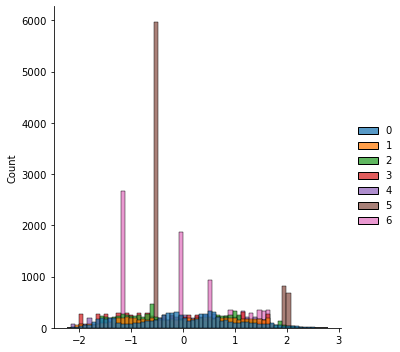

In [67]:
pt = PowerTransformer()
scaled_train_data=pt.fit_transform(X_train.to_numpy())
sns.displot(scaled_train_data)

In [69]:
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

**4. Apply linear regression.**

In [78]:
X_test_ct = pd.DataFrame(scaled_train_data)
X_test_ct

,0,1,2,3,4,5,6
0,-0.340765,-0.143033,-1.552039,-0.350352,-0.428756,-0.502522,1.660057
1,1.732220,1.108667,-0.712384,1.463437,-0.354308,-0.502522,-0.063268
2,0.142838,0.372284,-0.020814,0.582646,0.170412,2.032405,0.875803
3,-1.841641,-0.002560,-1.178270,-0.700972,1.525083,-0.502522,-1.143833
4,0.367618,-0.900458,0.496901,0.742711,0.302193,-0.502522,1.454127
...,...,...,...,...,...,...,...
7477,0.199678,-0.194957,0.593059,0.240451,0.650895,2.032405,0.513168
7478,0.928730,-0.082468,0.938141,0.971550,0.773350,-0.502522,-0.063268
7479,-1.511516,1.656755,-1.178270,-0.040648,-0.428756,-0.502522,-1.143833
7480,-0.980688,-1.203165,0.200536,-0.461825,-1.644616,2.032405,-1.143833


**5. Model Interpretation.**

In [81]:
X_train_const_ct = sm.add_constant(X_test_ct.to_numpy()) # adding a constant

model = sm.OLS(y_train, X_train_const_ct).fit() #It calculates parameters
predictions_train = model.predict(X_train_const_ct)

X_test_const_ct = sm.add_constant(X_test_ct) # adding a constant
predictions_test = model.predict(X_test_const_ct)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     490.3
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:27:14   Log-Likelihood:                -51659.
No. Observations:                7482   AIC:                         1.033e+05
Df Residuals:                    7474   BIC:                         1.034e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.8295      2.790    156.232      0.0